In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Synopsis

So far we have essentially only learned how to parse and enumerate the number of words in text (doesn't sound like much, huh? But that alone comprises a large amount of basic textual analysis). In this unit we will go a bit further and cover:

1. Preparing text for further analysis
2. Analyzing sentiment

We will also talk about how difficult advanced analysis of unstructured text is despite its appearance as an 'easy' task.

## Text as Data

As we discussed this morning, analyzing text is not nearly as simple as it would appear. In this module we're going to learn the basics of examining sentiment in text. 

We'll be working with an example text:

"Adam is totally cool. You should come to his class."

To begin with, let's answer some basic questions. 

* Is this overall sentence positive or negative?
* Which words make it positive or negative?
* Do all words have a positive or negative affect?

Now the question becomes, how can we automate the analysis of the sentiment in the text?

There are actually many ways to rate the positive or negative sentiment of a word, more complicated approaches involve machine-learning, but we'll start simply with using a dictionary.

There are many dictionaries that people have created to analyze sentiment, for our uses today we will use the AFINN dictionary that is provided in `Data/`

In [2]:
afinn_list = [l.strip().split() for l in open('../Data/Day5-Text-Analysis/AFINN/AFINN-111.txt', encoding = 'utf-8').readlines()]
print(afinn_list[:10])

[['abandon', '-2'], ['abandoned', '-2'], ['abandons', '-2'], ['abducted', '-2'], ['abduction', '-2'], ['abductions', '-2'], ['abhor', '-3'], ['abhorred', '-3'], ['abhorrent', '-3'], ['abhors', '-3']]


The AFINN dictionary is relatively simple. It gives a word and then it's numeric score of postivity or negativity (negative words are negative numbers).

But we really need to convert it to a dictionary if it's going to be useful to us (list lookups are expensive!)

In [3]:
#Place your code here
afinn = {}
for item in afinn_list[:10]:
    key = item[0]
    score = int(item[1])
    afinn[key] = score
    
print(afinn)

{'abhor': -3, 'abhorred': -3, 'abhors': -3, 'abhorrent': -3, 'abandon': -2, 'abducted': -2, 'abduction': -2, 'abandoned': -2, 'abandons': -2, 'abductions': -2}


In [4]:
#answer
afinn = {}

for word_set in afinn_list:
    afinn[' '.join(word_set[:-1])] = int(word_set[-1])
    
#print(afinn)


To start with, let's look at the words with sentiment in the example text.

In [5]:
example_text = "Adam is totally cool. You should come to his class"

In [6]:
###Place your code here
words = example_text.split()
print(words)

['Adam', 'is', 'totally', 'cool.', 'You', 'should', 'come', 'to', 'his', 'class']


In [11]:
example_words = [word.strip('. ') for word in example_text.split(' ')]
for word in example_words:
    if word in afinn:
        print('--- ', word, '\t', afinn[word.lower()])
    else:
        print(word)

Adam
is
totally
---  cool 	 1
You
should
come
to
his
class


As we can see, only word assigned a sentiment score is "cool".

`Adam` is a proper noun, `You` is a pronoun, `his` is a possessive - so no sentiment there

`is`, `should`, and `come` are the verbs - so no sentiment

`to` is a preposition

`class` is a noun

`totally` is a different story though. It's an adverb and is modifying `cool`, which is positive. However, the sentiment of `totally` is entirely dependent on the word that it is modifying. So on its own, it it doesn't actually have a score.

So we can judge that this overall text is mildly positive, there isn't that much to go on though since it's such a small piece! 

There could be more that we could write to understand `totally` and it's relationship to `cool`, but we'll save that for later. Right now we're going to stick to analyzing unigrams (single words) as just a bag (which actually works really well as a first approximation!

But one thing you'll notice is that there are a lot of words that don't add meaning that we're checking to see if they do have meaning. 

One set of words that doesn't really help are called stopwords. Stop words are the most common words in a language and don't really have a lot of meaning when it comes to the analysis of setniment in text.

For our lesson today we will need to download the `stopwords` corpora.

In [12]:
# A new window will open. Select only the materials that appear in the book
import nltk
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

Excellent! Now we will need to import our corpora.

In [13]:
from nltk.corpus import stopwords

And let's take a look at what is inside the stopwords list.

In [14]:
stopwords.words()

['og',
 'i',
 'jeg',
 'det',
 'at',
 'en',
 'den',
 'til',
 'er',
 'som',
 'på',
 'de',
 'med',
 'han',
 'af',
 'for',
 'ikke',
 'der',
 'var',
 'mig',
 'sig',
 'men',
 'et',
 'har',
 'om',
 'vi',
 'min',
 'havde',
 'ham',
 'hun',
 'nu',
 'over',
 'da',
 'fra',
 'du',
 'ud',
 'sin',
 'dem',
 'os',
 'op',
 'man',
 'hans',
 'hvor',
 'eller',
 'hvad',
 'skal',
 'selv',
 'her',
 'alle',
 'vil',
 'blev',
 'kunne',
 'ind',
 'når',
 'være',
 'dog',
 'noget',
 'ville',
 'jo',
 'deres',
 'efter',
 'ned',
 'skulle',
 'denne',
 'end',
 'dette',
 'mit',
 'også',
 'under',
 'have',
 'dig',
 'anden',
 'hende',
 'mine',
 'alt',
 'meget',
 'sit',
 'sine',
 'vor',
 'mod',
 'disse',
 'hvis',
 'din',
 'nogle',
 'hos',
 'blive',
 'mange',
 'ad',
 'bliver',
 'hendes',
 'været',
 'thi',
 'jer',
 'sådan',
 'de',
 'en',
 'van',
 'ik',
 'te',
 'dat',
 'die',
 'in',
 'een',
 'hij',
 'het',
 'niet',
 'zijn',
 'is',
 'was',
 'op',
 'aan',
 'met',
 'als',
 'voor',
 'had',
 'er',
 'maar',
 'om',
 'hem',
 'dan',
 'z

Great! You can see that the stop words list is actually very extensive. That's because it contains stopwords that are in most languages! So if you decide to analyze text in a non-English language, NLTK already has you covered.

Now let's check to see what is left of our example text after we remove the stopwords.

In [15]:
print([word for word in example_words if word not in stopwords.words()])

['Adam', 'totally', 'cool', 'You', 'class']


You can see that it really cut down the entire list of words to basically just the nouns, adjectives, and modifiers. 

Removing stopwords is extremely important when we're trying to get to the real meat of a text. 

So let's move onto actual text and apply these principles. Load Othello and get Hamlet and Iago's speaking parts.

Now let's work on the actual text. Extract Othello and Iago's dialogue using our code from the morning:

In [15]:
#Extract Othello


In [3]:
#Answer
def strip_punctuation(word):
    punc = ',.:;"\'?![]{}-'
    return word.lstrip(punc).strip(punc).lower()

def find_character_dialogue(character_name, text):
    '''
    Finds all dialogue lines for a given character name
    input:
        character_name: name of character, all caps including period. 
        text: text to find character name in
    output:
        dialogue: list of words character uses
    '''
    dialogue = []

    #I create a variable to track if othello was the last character speaking
    preceding_character = False
    for line in text:
        #First check is if we are in a correct character block of dialogue or not
        if preceding_character == True:
            #Check to make sure that another character isn't speaking
            #Continued text starts with four spaces
            if '    ' == line[:4]:
                dialogue += [w for w in line.split(' ') if w != '' and w != ' ']
            else:
                #Character isn't speaking, flip the preceding_othello flag
                preceding_character = False
        else:
            #lets check to see if character is speaking
            if character_name in line:
                #append the line to othellos dialogue
                dialogue += [w for w in line.split(character_name)[1].split(' ') if w != '' and w != ' ']
                #Switch our preceding check to true
                preceding_character = True
            else:
                #I am explicitly accounting for the character not speaking, but not using this for anything
                pass
    return dialogue

complete_works = open('../Data/Day5-Text-Analysis/Shakespeare.txt', encoding = 'utf-8').read()
#Cut off the beginning plays
othello_full = complete_works.split('OTHELLO, MOOR OF VENICE\n\nby William Shakespeare\n\n\n\n')[1]
#Cut off the plays after
othello_text = othello_full.split('\n\n\nTHE END')[0]
#Clean out the electronic message
emessage = '''<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>'''
emessage_split = othello_text.split(emessage)
#Preamble is the first part
othello_preamble = emessage_split[0]
#Text is the other part
othello_clean_text = ''.join(emessage_split[1:])
othello_lines = othello_clean_text.split('\n')
othellos_dialogue = [strip_punctuation(w) for w in find_character_dialogue('OTHELLO.', othello_lines)]
print("Othello dialogue size", len( othellos_dialogue))
iagos_dialogue = [strip_punctuation(w) for w in find_character_dialogue('IAGO.', othello_lines)]
print("Iago dialogue size", len( iagos_dialogue))

Othello dialogue size 6284
Iago dialogue size 8330


Excellent, now let's actually remove all of the stopwords and see what that does to the dialogue size of the two characters.

In [18]:
cleaned_othello = [word for word in othellos_dialogue if word not in stopwords.words()]
cleaned_iago = [word for word in iagos_dialogue if word not in stopwords.words()]

print("Othello dialogue size", len( othellos_dialogue))
print("Othello dialogue size without stopwords", len( cleaned_othello))
print('----')
print("Iago dialogue size", len( iagos_dialogue))
print("Iago dialogue size without stopwords", len( cleaned_iago))

Othello dialogue size 6284
Othello dialogue size without stopwords 3124
----
Iago dialogue size 8330
Iago dialogue size without stopwords 3920


We see that there is a non-trivial reduction in the number of words spoken for each character (which should help in further processing!)

Now what does the distribution of sentiment look like for each of the two characters? Plot the two distributions in separate subplots.

In [18]:
###Place your code here


Othelo scored words 470
Iago scored words 537

4 -4
Othello average  0.409
Iago average 	 0.328


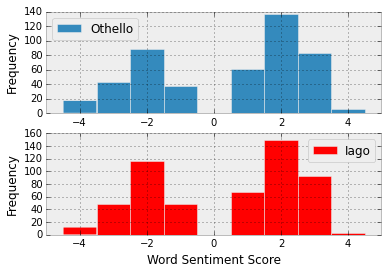

In [48]:
#Answer
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

othello_sentiment = [afinn[word] for word in cleaned_othello if word in afinn]
iago_sentiment = [afinn[word] for word in cleaned_iago if word in afinn]
print("Othelo scored words {0}".format(len(othello_sentiment)))
print("Iago scored words {0}".format(len(iago_sentiment)))
print()
    
    
#Figure
fig = plt.figure()
#Plot othellos
ax1 = fig.add_subplot(211)
print(max(othello_sentiment), min(othello_sentiment))
ax1.hist(othello_sentiment, normed = False, label='Othello', bins=np.linspace(-4.5, 4.5, 10))
ax1.set_xlim(-5, 5)
ax1.legend(loc='best')
ax1.set_ylabel('Frequency')
#Plot iagos
ax2 = fig.add_subplot(212)
ax2.hist(iago_sentiment, color = 'red', normed=False, label='Iago', bins=np.linspace(-4.5, 4.5, 10))
ax2.set_xlim(-5, 5)
ax2.legend(loc='best')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Word Sentiment Score')

print("Othello average  {0:5.3f}".format(np.average(othello_sentiment)))
print("Iago average \t {0:5.3f}".format(np.average(iago_sentiment)))

And they look almost exactly the same! However, we can tell that there is a nearly 20% difference in the averages.

The distribution of sentiment scores is interesting, but does not give us a picture of the arc of the story.  To extract that information, we need to keep track of when each word is spoken.

In [ ]:
###Sentiment over time for Iago and Othello


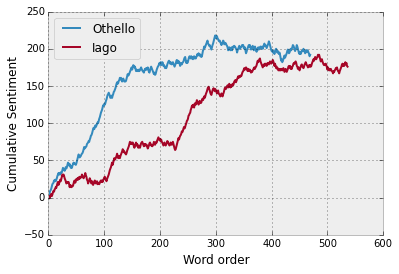

In [47]:
#Answer
plt.plot(np.cumsum(othello_sentiment), label="Othello")
plt.plot(np.cumsum(iago_sentiment), label="Iago")
plt.legend(loc='best')
plt.ylabel('Cumulative Sentiment')
plt.xlabel('Word order')

Let's focus on Othelo first. Interesting! We can see that the first 150 scored words uttered by Othello are quite positive. The next 150 are only slightly positive, and the last 250 words have a slight negative bias. 

It might be time to actually to refresh ourselves on the [story of Othello](https://en.wikipedia.org/wiki/Othello)....

Iago's speech has a different arc. The positivity in his utterances comes in spikes. The rest of the time he keeps near neutrality of sentiment.  As if he was hiding his feelings...

How does this compare to the whole text?

In [ ]:
### Place your code here



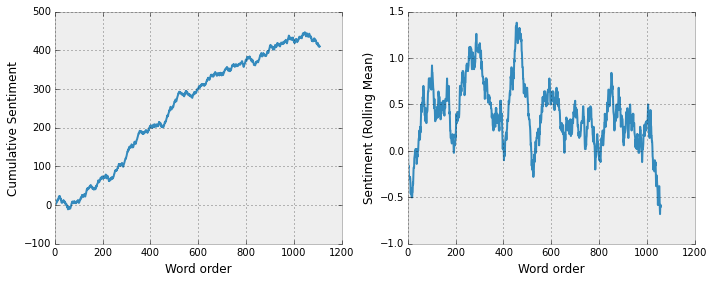

In [63]:
#Answer
def rolling_mean(data, window = 10):
    roll_mean = []
    for dindex in range( len(data) - window):
        roll_mean.append(np.average(data[dindex:(dindex+window)]))
    return roll_mean
        
play_sentiment = [afinn[word] for word in othello_clean_text.split(' ') if word in afinn]

#PLot the graphs
fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(121)
ax.plot(np.cumsum(play_sentiment), label='Othello')
ax.set_ylabel('Cumulative Sentiment')
ax.set_xlabel('Word order')
#Rolling mean
ax2 = fig.add_subplot(122)
ax2.plot(rolling_mean(play_sentiment, 50))
ax2.set_ylabel('Sentiment (Rolling Mean)')
ax2.set_xlabel('Word order')
#Graph features
plt.tight_layout()

Without a reference point (i.e., comparing one character to another), it's acutally a bit easier to see the arc of the story in the rolling mean. 

Here we can see that Othello lives up to its label as a tragedy. Near the end of the labeled words there is a steep decline in the sentiment of words used.

Let's see if we can see more of a difference between Othello and Iago using the rolling mean:

In [23]:
#Your code here


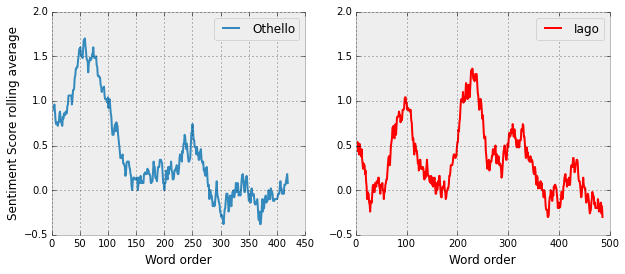

In [61]:
#Answer

fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(121)
ax.plot(rolling_mean(othello_sentiment, 50), label='Othello')
ax.set_ylabel('Sentiment Score rolling average')
ax.set_xlabel('Word order')
ax.legend(loc='best')
#ax2
ax2 = fig.add_subplot(122)
ax2.set_ylim([-0.5, 2.0])
ax2.plot(rolling_mean(iago_sentiment, 50), color = "red", label='Iago')
ax2.set_xlabel('Word order')
ax2.legend(loc='best')

Ah! That's actually a much easier way to intuit the dialogue of each individual character!

Let's actually compare the dialogue of every character in Othello. 

In [69]:
#Your code here


In [5]:
#Answer
import re

#Get the characters names
name_regex = '[A-Z]+,'
characters = [re_obj.group().strip(',') + '.' for re_obj in re.finditer(name_regex, othello_preamble)]
#Get all dialogue
character_dialogue = {}
for character in characters:
    temp_diag = [strip_punctuation(word).lower() for word in find_character_dialogue(character, othello_lines)]
    #Clean it up
    temp_sentiment = [afinn[word] for word in temp_diag if word in afinn]
    #hold it in the dictionary
    character_dialogue[character] = temp_sentiment
#Now plot it
fig = plt.figure(figsize = (12, 9))
for i, (character, sentiment) in enumerate( sorted(character_dialogue.items()) ):
    ax = fig.add_subplot(4, 3, i+1)
    #Calculate the window
    if len(sentiment) > 50:
        window = 50
    else:
        window = int(len(sentiment)/5)
    #Plot it out
    ax.plot(rolling_mean(sentiment, window), label = character)
    ax.autoscale()
    #ax.set_ylim(-0.5, 1.5)
    ax.legend(loc='best')

NameError: name 'afinn' is not defined

Well, I guess we can see that a few characters had quite a poor turn near the end there!

How well does our technique work with a different Shakespeare play, say "The Merchant of Venice".

Refactor the original code to extract Othelo and make it pull out the character dialogue of any play.

In [113]:
#Place your code here


In [6]:
#Answer

def character_dialogue_extractor(play_name):
    '''
    Pulls out all character dialogue and overall play sentiment for any play in the Shakespeare.txt file
    '''
    complete_works = open('../Data/Day5-Text-Analysis/Shakespeare.txt').read()
    #Cut off the beginning plays
    full_text = complete_works.split(play_name + '\n\nby William Shakespeare\n\n\n\n')[1]
    #Cut off the plays after
    play_text = full_text.split('\n\n\nTHE END')[0]
    #Clean out the electronic message
    emessage_split = play_text.split(emessage)
    #Preamble is the first part
    preamble = emessage_split[0]
    #Extract the characters
    name_regex = '[A-Z]+,'
    characters = [re_obj.group().strip(',') + '.' for re_obj in re.finditer(name_regex, preamble)]
    #Text is the other part
    cleaned_text = ''.join(emessage_split[1:])
    play_lines = cleaned_text.split('\n')
    #Get the character_text
    character_dialogue = {}
    for character in characters:
        temp_diag = [strip_punctuation(word).lower() for word in find_character_dialogue(character, play_lines)]
        #Clean it up
        temp_sentiment = [afinn[word] for word in temp_diag if word in afinn]
        #hold it in the dictionary
        character_dialogue[character] = temp_sentiment
    #Now do the whole play
    play_words = [strip_punctuation(w).lower() for w in ''.join(play_lines).split(' ')]
    play_sentiment = [afinn[word] for word in play_words if word in afinn]
    character_dialogue['Whole Play'] = play_sentiment
    return character_dialogue

venice_merchant = character_dialogue_extractor('THE MERCHANT OF VENICE')

fig = plt.figure(figsize = (15, 15))
for i, (character, sentiment) in enumerate( sorted(venice_merchant.items()) ):
    ax = fig.add_subplot(5, 5, i+1)
    #Calculate the window
    if len(sentiment) > 50:
        window = 50
    else:
        window = int(len(sentiment)/5)
    #Plot it out
    ax.plot(rolling_mean(sentiment, window), label = character)
    ax.autoscale()
    #ax.set_ylim(-0.5, 1.5)
    ax.legend(loc='best')
plt.tight_layout()

NameError: name 'afinn' is not defined